# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴보기로 한다.
* 처음으로 파일데이터에서 상권별 업종밀집통계정보를 다운로드 받아보았다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
%ls data

상가업소_201709/
상가업소_201709.zip
상권별_업종밀집통계_2016_.csv
서울특별시_자치구별_상권분석_정보_2017_.csv
전국도시공원표준데이터.csv
지역별_규모별_㎡당_평균_분양가격_천원__18.4월.csv


In [4]:
shop = pd.read_csv('data/상권별_업종밀집통계_2016_.csv', encoding='cp949')
shop.shape

(805681, 6)

In [5]:
shop.head()

,상권명칭,상권번호,관리년월,대분류명,중분류명,과밀지수(밀집도)
0,강릉역광장_2,2523,201601,소매,가전제품소매,1.0818
1,구미역_3,1149,201601,소매,가전제품소매,0.8865
2,전북 전주시 중화산1동_1,768,201601,소매,가전제품소매,1.1757
3,충청북도청_2,1309,201601,소매,가전제품소매,0.3574
4,충북 청주시 복대1동_1,1311,201601,소매,가전제품소매,0.6849


In [6]:
shop.tail()

,상권명칭,상권번호,관리년월,대분류명,중분류명,과밀지수(밀집도)
805676,경남 양산시 덕계동_1,626,201612,소매,NaN,1.2906
805677,경북 구미시 신평1동_2,1143,201612,업종분류불능,NaN,0.5677
805678,안양역_5,1663,201612,소매,NaN,1.6597
805679,양산역,616,201612,소매,NaN,1.4103
805680,망포역_2,1473,201612,업종분류불능,NaN,0.7113


In [7]:
shop['대분류명'].value_counts()

소매        791413
업종분류불능     14268
Name: 대분류명, dtype: int64

In [8]:
shop['중분류명'].value_counts()

건강/미용식품         98132
유아용품            88434
의약/의료품소매        81273
철물/난방/건설자재소매    78100
페인트/유리제품소매      74083
가전제품소매          71625
자동차/자동차용품       22440
Name: 중분류명, dtype: int64

## 서울시 자치구별 상권분석 정보 2017

In [9]:
seoul = pd.read_csv('data/서울특별시_자치구별_상권분석_정보_2017_.csv', encoding='euc-kr')
seoul.shape

(333, 6)

In [10]:
seoul.head()

,광역시도,시군구,업종대분류,업종중분류,업종소분류,건수
0,서울특별시,강남구,학문/교육,학원-보습교습입시,학원-검정고시,2
1,서울특별시,강남구,학문/교육,학원-어학,학원-어린이영어,18
2,서울특별시,강남구,학문/교육,학원-어학,학원-외국어/어학,636
3,서울특별시,강남구,학문/교육,학원-보습교습입시,학원-입시,1173
4,서울특별시,강남구,학문/교육,학원-보습교습입시,학원-편입,3


In [11]:
seoul.tail()

,광역시도,시군구,업종대분류,업종중분류,업종소분류,건수
328,서울특별시,종로구,학문/교육,학원-음악미술무용,학원-무용,5
329,서울특별시,중구,학문/교육,학원-예능취미체육,학원-가요,3
330,서울특별시,중구,학문/교육,학원-음악미술무용,학원-무용,5
331,서울특별시,중랑구,학문/교육,학원-음악미술무용,학원-무용,2
332,서울특별시,중랑구,학문/교육,학원-예능취미체육,학원-배우/탤런트,1


* 업종대분류에 학문/교육만 있다.

In [12]:
seoul['업종대분류'].value_counts()

학문/교육    333
Name: 업종대분류, dtype: int64

* 업종대분류를 추출해 봤더니 학문/교육 분야만 있다.
* 그렇기 때문에 소분류 교육관련 분류만 있다.

In [13]:
seoul['업종소분류'].value_counts()

학원-외국어/어학      25
학원-어린이영어       25
학원-입시          25
피아노/바이올린/기타    25
어린이집           25
유치원            25
유아교육기관기타       24
학원-무용          24
놀이방            23
실내놀이터-유아       21
학원-국악          20
학원-배우/탤런트      17
학원-가요          16
블럭놀이방          14
학원-검정고시        12
학원-편입          10
동화구연            2
Name: 업종소분류, dtype: int64

In [14]:
# 상가업소정보 2017년 9월 데이터
shop_201709_01 = pd.read_csv('data/상가업소_201709/shop_201709_01.csv', encoding='cp949')
shop_201709_01.shape

(460822, 39)

In [15]:
shop_201709_01.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774


In [16]:
shop_201709_01.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
460819,15898705,팝콘피씨,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1121510700101710000026151,NaN,서울특별시 광진구 광나루로26길 40,143926,5022.0,NaN,1,NaN,127.078059,37.545272
460820,15883107,키즈코코,NaN,D,소매,D05,의복의류,D05A05,아동복판매,G47416,...,2614010600101660006000001,대신롯데캐슬,부산광역시 서구 대티로 161,602093,49208.0,NaN,NaN,NaN,129.010414,35.116648
460821,15915239,하서족발,NaN,Q,음식,Q01,한식,Q01A08,족발/보쌈전문,I56111,...,2671025622107170008000001,서진프라자,부산광역시 기장군 정관읍 정관7로 34,619963,46015.0,NaN,NaN,107,129.178633,35.321823


In [17]:
# 생각보다 결측치가 많다.
shop_201709_01.isnull().sum()

상가업소번호            0
상호명               1
지점명          405614
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      25931
표준산업분류명       27032
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         77841
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        399010
건물관리번호            0
건물명          258433
도로명주소             0
구우편번호             0
신우편번호            11
동정보          416558
층정보          199326
호정보          388686
경도                2
위도                2
dtype: int64

In [18]:
from plotnine import *

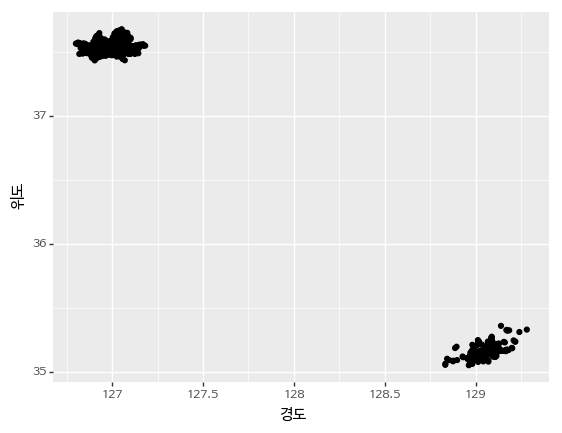

<ggplot: (295669042)>

In [19]:
# 모든 데이터를 한번에 찍으면 너무 오래 걸려서 1000개만 찍어본다.
# 양쪽에 데이터가 몰려있는데 왜 그런지 주소 정보를 다시보자.
(ggplot(shop_201709_01[:1000])
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [20]:
# 데이터를 보니 서울과 부산만 있는거 같다. 
# 그래서 서울과 그 외 데이터로 나눠봤다.
shop_seoul = shop_201709_01.loc[shop_201709_01['도로명주소'].str.startswith('서울')]
shop_except_seoul = shop_201709_01.loc[~shop_201709_01['도로명주소'].str.startswith('서울')]
print(shop_seoul.shape)
print(shop_except_seoul.shape)

(324817, 39)
(136005, 39)


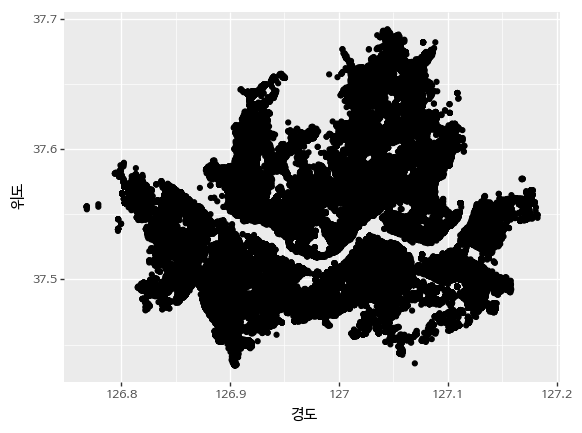

<ggplot: (295984939)>

In [21]:
# 서울만 찍어봤더니 서울지도 비슷하게 나온다
(ggplot(shop_seoul)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [22]:
print(shop_201709_01.shape)
shop_201709_01['시도'] = shop_201709_01['도로명주소'].str.split(' ', expand=True)[0]
shop_201709_01['구군'] = shop_201709_01['도로명주소'].str.split(' ', expand=True)[1]
print(shop_201709_01.shape)
shop_201709_01.columns

(460822, 39)
(460822, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [23]:
# 서울만 찍어봤더니 서울지도 비슷하게 나온다
# 서울 DF을 다시 만들어 준다.
shop_seoul = shop_201709_01.loc[shop_201709_01['도로명주소'].str.startswith('서울')]
shop_seoul.shape

(324817, 41)

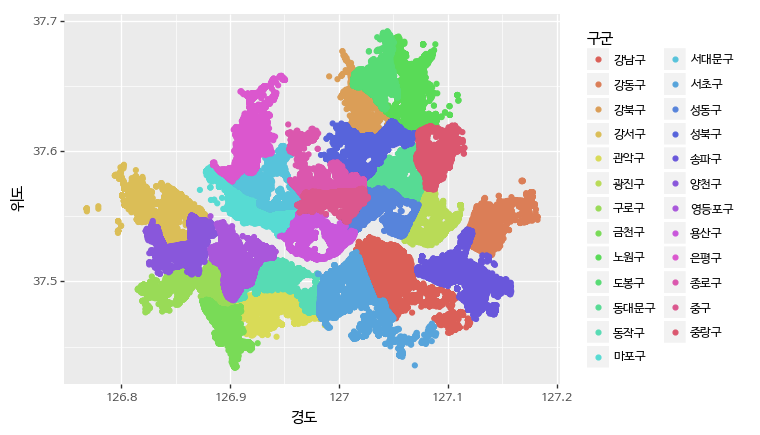

<ggplot: (-9223372036536578479)>

In [24]:
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

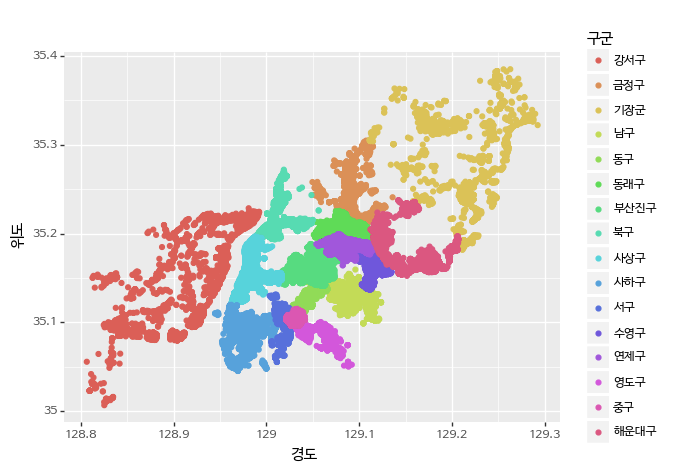

<ggplot: (-9223372036558751779)>

In [25]:
# 부산만 있는거 같다.
# 서울만 제외한 나머지 지역으로 DF을 다시 생성해 준다.
shop_except_seoul = shop_201709_01.loc[~shop_201709_01['도로명주소'].str.startswith('서울')]
(ggplot(shop_except_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)